In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import joblib

In [2]:
df = pd.read_csv("./data/bbc_news_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [3]:
X = df['Text']
y = df['Category']

In [4]:
category_names = df['Category'].unique()
print(category_names)

['business' 'tech' 'politics' 'sport' 'entertainment']


In [5]:
category_counts = df['Category'].value_counts()
print(category_counts)

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64


Text(0, 0.5, 'Number of Articles')

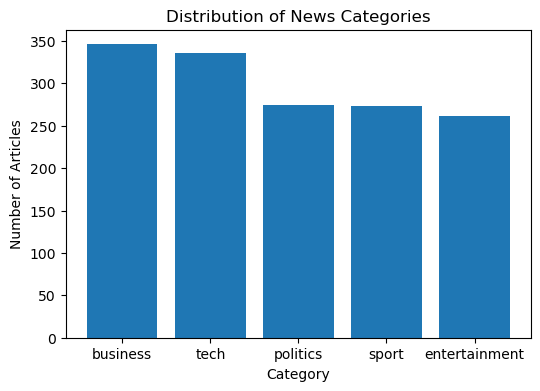

In [6]:
plt.figure(figsize=(6,4))
plt.bar(x = category_names, height=category_counts)
plt.title("Distribution of News Categories")
plt.xlabel("Category")
plt.ylabel("Number of Articles")


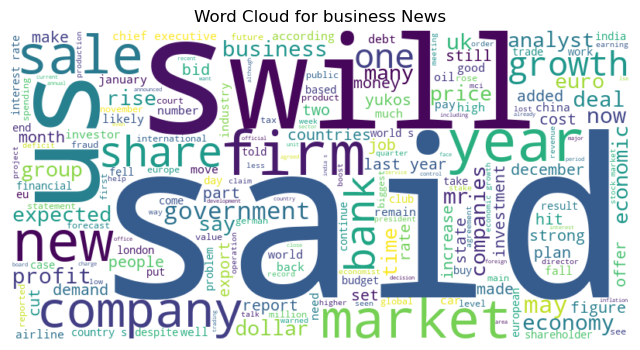

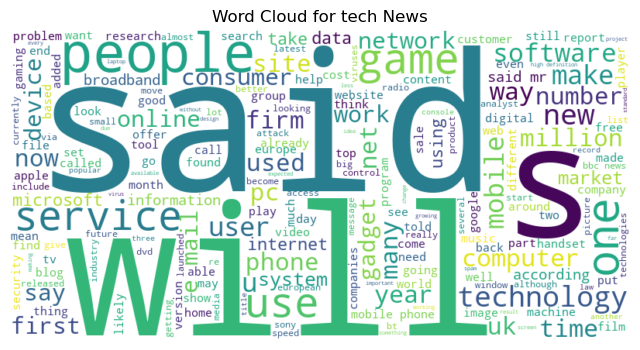

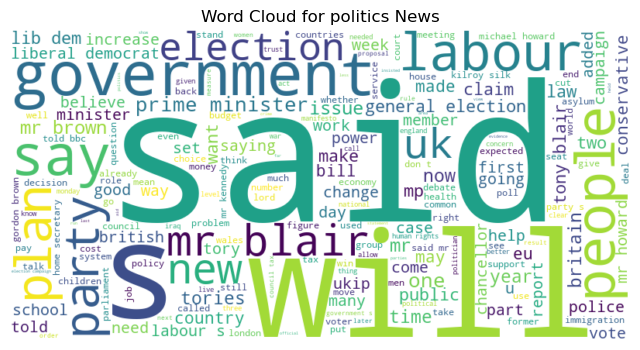

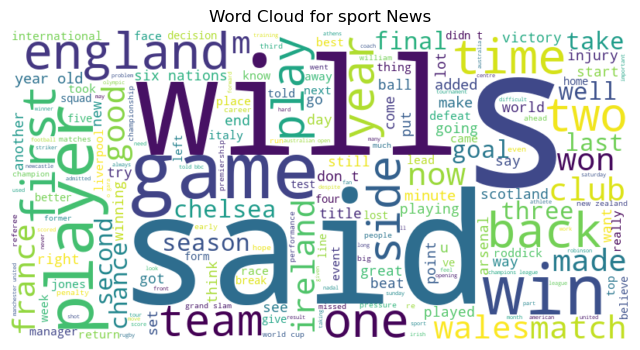

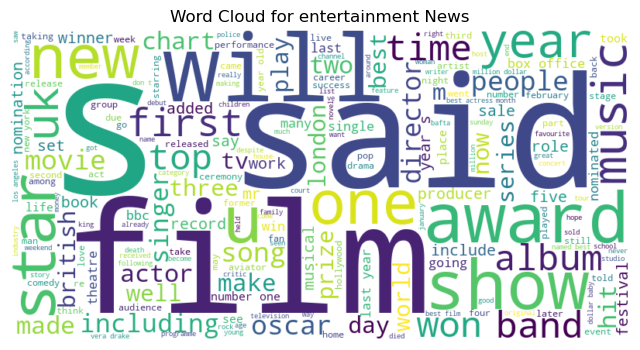

In [7]:
for category in category_names:
    text = " ".join(df[df['Category'] == category]['Text'].values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud.to_image(), interpolation='bilinear')
    plt.title(f"Word Cloud for {category} News")
    plt.axis('off')
    plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1192,)
Shape of y_train: (1192,)
Shape of X_test: (298,)
Shape of y_test: (298,)


In [9]:
nb_model = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())
nb_model.fit(X_train, y_train)
y_preds = nb_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_preds))
print("\nClassification Report:\n", classification_report(y_test, y_preds))

Accuracy Score: 0.9563758389261745

Classification Report:
                precision    recall  f1-score   support

     business       0.94      0.97      0.95        75
entertainment       1.00      0.96      0.98        46
     politics       0.91      0.95      0.93        56
        sport       0.97      1.00      0.98        63
         tech       0.98      0.90      0.94        58

     accuracy                           0.96       298
    macro avg       0.96      0.95      0.96       298
 weighted avg       0.96      0.96      0.96       298



Text(0.5, 1.0, 'Confusion Matrix')

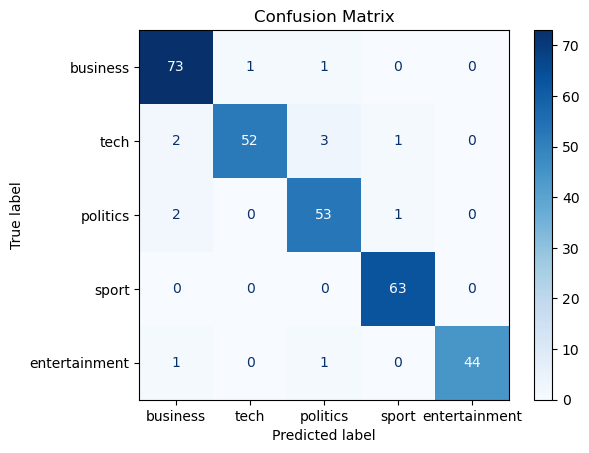

In [10]:
cm = confusion_matrix(y_test, y_preds, labels=category_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=category_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")

In [11]:
sample_text = [["The government has announced new policies to boost the economy."],
               ["The local team won their championship game last night."],
               ["A breakthrough in renewable energy technology has been achieved."],
               ["The latest blockbuster movie has received rave reviews."],
               ["Scientists have discovered a new species in the Amazon rainforest."]]
predicted_category = nb_model.predict([item[0] for item in sample_text])
print(predicted_category)

['business' 'sport' 'tech' 'entertainment' 'sport']


In [12]:
joblib.dump(nb_model, "./models/news_classifier_model.joblib")

['./models/news_classifier_model.joblib']